In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
def std(x):
    
    x_copy = x.copy()
    
    for i in range(x_copy.shape[0]):
        x_copy[i] = (x_copy[i] - x_copy[i].mean()) / x_copy[i].std()
        
    return x_copy

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target, coef = make_regression(
    n_samples=100, 
    n_features=10,
    n_informative=2, 
    n_targets=1,
    noise=10, 
    coef=True
)

data[:2]

array([[ 0.55481179, -0.27814022,  1.0773386 , -0.30724506,  1.2473331 ,
         0.97977947,  0.25099572,  0.61517015, -0.52157055,  0.04062445],
       [ 1.76514053,  0.41416809,  0.95192208,  1.44165025, -0.28949901,
         1.2883411 ,  1.18851083,  1.04622009,  3.24782841,  2.09566646]])

In [4]:
data_std = std(data)
data_std[:2]

array([[ 0.31784114, -1.0836599 ,  1.19702968, -1.13263086,  1.48305751,
         1.03287949, -0.19335102,  0.41939837, -1.49324876, -0.54731565],
       [ 0.49799546, -0.99658334, -0.40166691,  0.14011865, -1.77504921,
        -0.02948704, -0.13992912, -0.29734515,  2.13829086,  0.8636558 ]])

In [5]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [6]:
def gb(X, y, iterations=1e4, alpha=1e-2, lambda_=1e-4):
    
    X = X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))+ 2*lambda_*W) # <- L2
        
        errors.append([i, err])
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    errors = np.array(errors)
    return errors

In [7]:
def sgb(X, y, iterations=1e4, qty_in_batch=1, alpha=1e-2, lambda_=1e-4):
    
    X=X.T
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            
            y_pred_tmp = np.dot(W, X_tmp)
            err = mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + 2*lambda_*W) # <- L2
            
            errors.append([i, err])

        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    return errors

In [8]:
iter_ = 1000
alpha = 1e-2

In [9]:
gb_res = gb(X=data, y=target, iterations=iter_, alpha=alpha, lambda_=1e-4)

100 [26.09384758 -4.18740477  1.0732742  -3.10945938 -0.7552256  42.65908005
  1.99963312  0.21660989  4.26086142  0.61637285] 170.7930035859955
200 [30.70527516 -3.23520421  0.76614403 -2.20980712  0.11729592 46.7763771
  1.07066518  0.5511064   2.03971938  0.13165653] 105.61984896326328
300 [31.73174609 -2.89795334  0.60985075 -1.96560588  0.34587706 47.3835194
  0.69542372  0.62937028  1.43244158  0.15169128] 101.81586935303766
400 [31.97920786 -2.82419772  0.56380693 -1.91559177  0.40005485 47.49295693
  0.58045117  0.63940165  1.2851705   0.18720801] 101.41653654386215
500 [32.04116574 -2.81113695  0.55080825 -1.90589424  0.4131669  47.51374569
  0.54769048  0.63944853  1.24916228  0.20192197] 101.34984704312096
600 [32.05703219 -2.80949076  0.54704772 -1.90401979  0.41644899 47.51766803
  0.53856998  0.63891223  1.24017153  0.20681544] 101.33567303031387
700 [32.06116146 -2.80952381  0.54593635 -1.90365221  0.41728916 47.51837696
  0.53604489  0.63865765  1.23787971  0.20831786] 

In [10]:
sgb_res = sgb(X=data, y=target, iterations=iter_, qty_in_batch=32, alpha=alpha, lambda_=1e-4)

100 [25.65237838 -4.26817595  1.1010888  -3.03441842 -0.088887   41.82764639
  1.97007667 -0.28345309  4.44285893  0.73602739] 286.3907915837202
200 [29.85175121 -3.32640239  0.80781872 -2.2538566   0.21966938 45.63164328
  1.14983818  0.36883135  2.30560125  0.2165031 ] 155.37045051089018
300 [30.70998126 -3.02643167  0.65707027 -2.04651114  0.29371934 46.18708894
  0.829804    0.5238538   1.73681765  0.22759001] 140.25518597725664
400 [30.9021251  -2.96589649  0.61282294 -2.00487201  0.30386581 46.28564332
  0.73720309  0.55553987  1.60253765  0.25658635] 137.11290396920495
500 [30.94698631 -2.95627251  0.60050658 -1.99692813  0.30430302 46.30419657
  0.71227304  0.56207685  1.57055769  0.26822917] 136.31200001224184
600 [30.95771444 -2.95534113  0.59703147 -1.99540681  0.30392121 46.30773171
  0.70570047  0.56351351  1.56276901  0.27194104] 136.0994966478879
700 [30.96032311 -2.95547622  0.59603735 -1.99510803  0.3037014  46.30840134
  0.70397361  0.56385681  1.56082917  0.2730321 ]

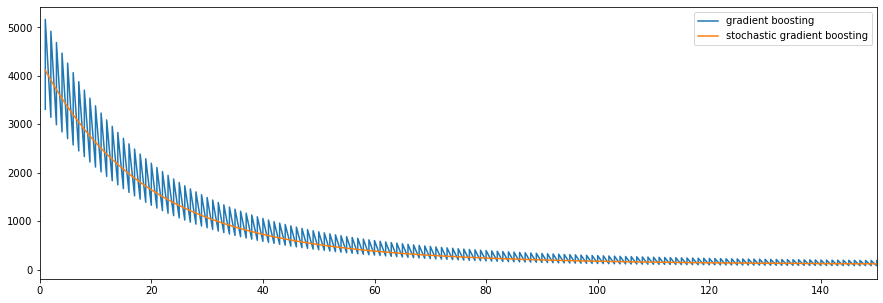

In [11]:
plt.figure(figsize=(15, 5))

plt.plot(sgb_res[:,0], sgb_res[:,1], label='gradient boosting')
plt.plot(gb_res[:,0], gb_res[:,1], label='stochastic gradient boosting')

plt.legend()
plt.xlim(0,150)

plt.show()